[*********************100%***********************]  1 of 1 completed

View the actual column name structure: MultiIndex([( 'Close', 'BTC-EUR'),
            (  'High', 'BTC-EUR'),
            (   'Low', 'BTC-EUR'),
            (  'Open', 'BTC-EUR'),
            ('Volume', 'BTC-EUR')],
           names=['Price', 'Ticker'])


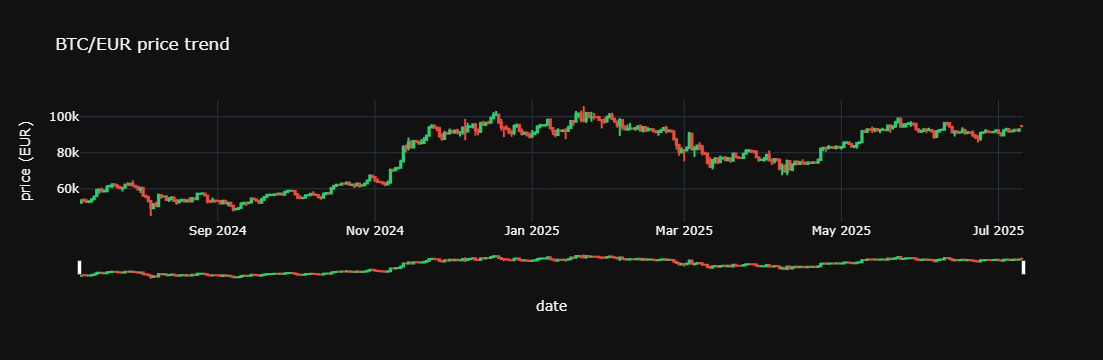

In [2]:
import yfinance as yf
import plotly.graph_objects as go
import pandas as pd

CURRENCY = 'EUR'

def getData(crypto):
    data = yf.download(
        tickers=f'{crypto}-{CURRENCY}',
        period="1y",
        interval="1d",
        auto_adjust=True
    )
    return data

btc_data = getData('BTC')

if btc_data is not None:

    print("View the actual column name structure:", btc_data.columns)
    

    def get_column(data, col_type):
        for col in data.columns:
            if col_type.lower() in str(col).lower():
                return data[col]
        raise KeyError(f"can't find {col_type}")
    

    fig = go.Figure(data=[go.Candlestick(
        x=btc_data.index,
        open=get_column(btc_data, 'Open'),    
        high=get_column(btc_data, 'High'),
        low=get_column(btc_data, 'Low'),
        close=get_column(btc_data, 'Close'),
        increasing_line_color='#2ECC71',
        decreasing_line_color='#E74C3C'
    )])
    
    fig.update_layout(
        title=f'BTC/{CURRENCY} price trend',
        xaxis_title='date',
        yaxis_title=f'price ({CURRENCY})',
        template='plotly_dark',
        xaxis_rangeslider_visible=True
    )
    
    fig.show()
    

    btc_data.to_csv('btc_eur_data.csv')
else:
    print("Data acquisition failed")